In [15]:
import sys
sys.path.append('../lung_GAN')

import torch
import lung_BoW_data
import BigBiGAN

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [44]:
dataset = lung_BoW_data.Dataset(size = (512, 512))
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)
X = next(iter(dataloader))
M = BigBiGAN.G_E_D(resolution = 512)
M.load_state_dict(torch.load("../lung_GAN/lung_512/model/model47000"))

Param count for Gs initialized parameters: 10750625
Param count for Ds initialized parameters: 9118432
Param count for Ds initialized parameters: 9399137


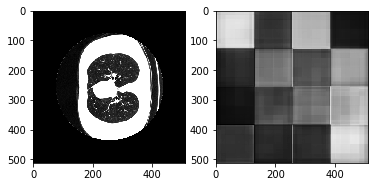

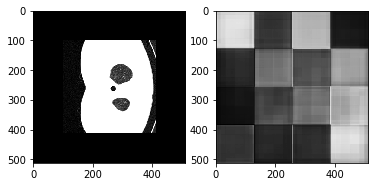

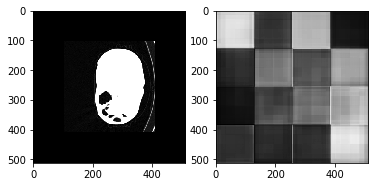

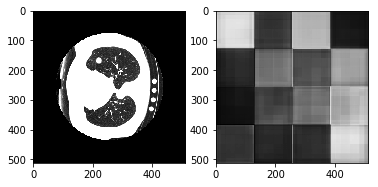

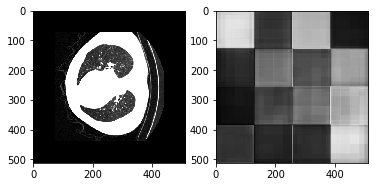

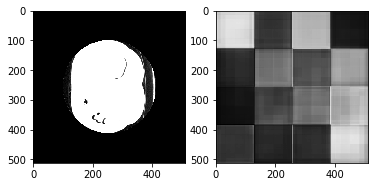

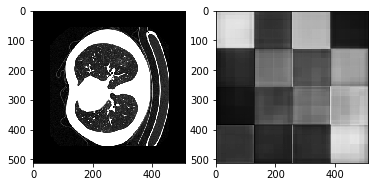

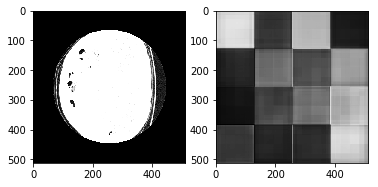

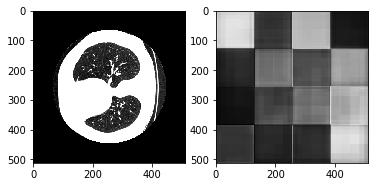

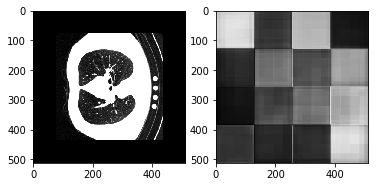

In [45]:
for iii in range(10):
    recon_x = M.G(M.E(X[ [iii] ])).cpu().data.numpy()[0,0]
    x = X[iii].cpu().data.numpy()
    plt.figure()
    plt.subplot(121)
    plt.imshow(x[0], cmap = "gray")
    plt.subplot(122)
    plt.imshow(recon_x, cmap = "gray")
    

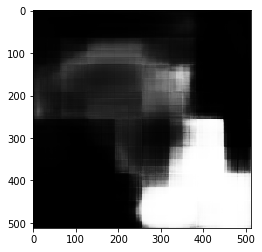

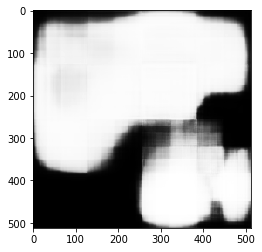

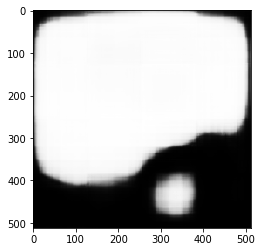

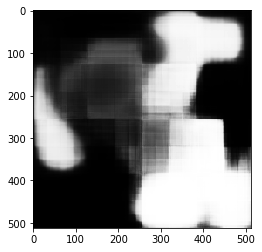

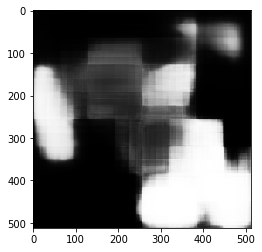

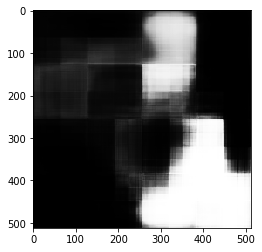

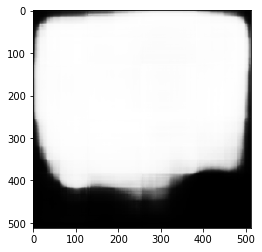

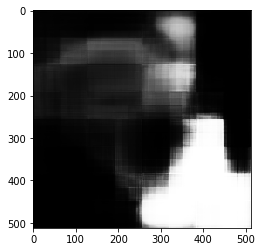

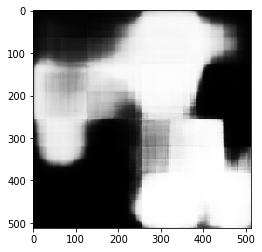

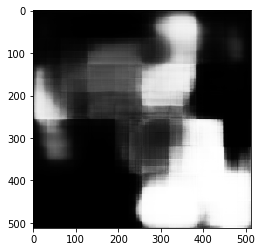

In [46]:
Z = torch.randn([10, 128]).cuda()
generated_x = M.G(Z).cpu().data.numpy()
for iii in range(10):
    x = generated_x[iii, 0]
    plt.figure()
    plt.imshow(x, cmap = "gray")
    

In [33]:
dataset = lung_BoW_data.Dataset(size = (64, 64))
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)
X = next(iter(dataloader))
M = BigBiGAN.G_E_D(resolution = 64)
M.load_state_dict(torch.load("../lung_GAN/lung_64/model/model50000"))

Param count for Gs initialized parameters: 9832321
Param count for Ds initialized parameters: 4839680
Param count for Ds initialized parameters: 5120385


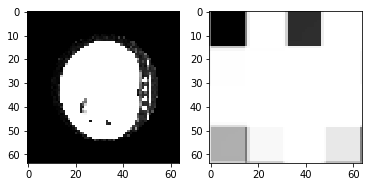

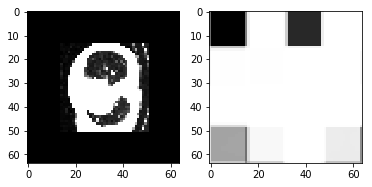

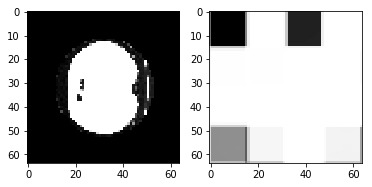

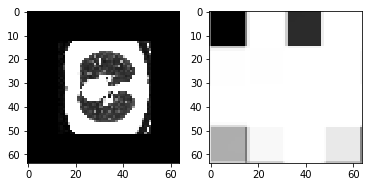

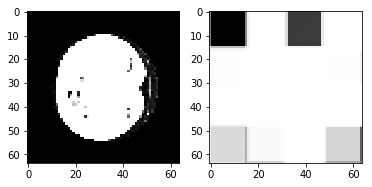

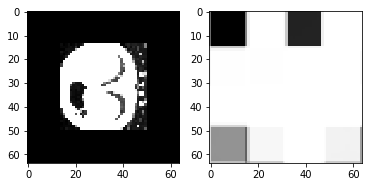

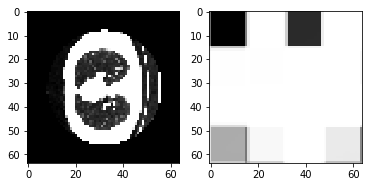

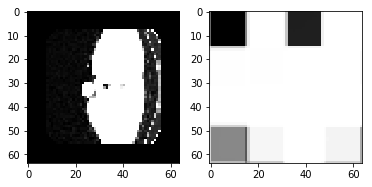

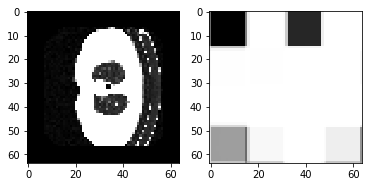

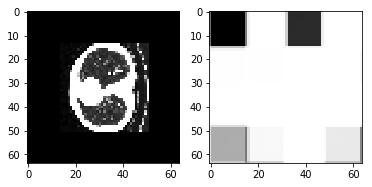

In [34]:
for iii in range(10):
    recon_x = M.G(M.E(X[ [iii] ])).cpu().data.numpy()[0,0]
    x = X[iii].cpu().data.numpy()
    plt.figure()
    plt.subplot(121)
    plt.imshow(x[0], cmap = "gray")
    plt.subplot(122)
    plt.imshow(recon_x, cmap = "gray")
    

In [38]:
dataset = lung_BoW_data.Dataset(size = (256, 256))
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)
X = next(iter(dataloader))
M = BigBiGAN.G_E_D(resolution = 256)
M.load_state_dict(torch.load("../lung_GAN/lung_256/model/model50000"))

Param count for Gs initialized parameters: 10737089
Param count for Ds initialized parameters: 9104896
Param count for Ds initialized parameters: 9385601


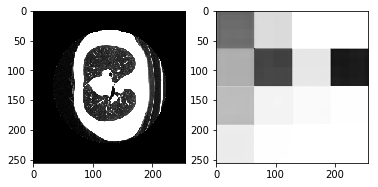

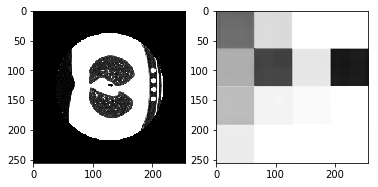

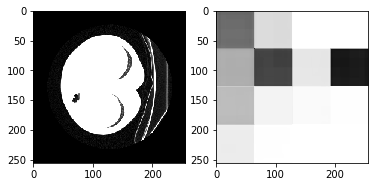

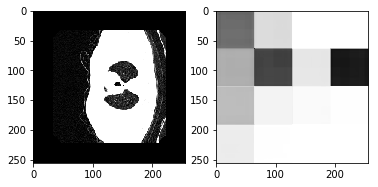

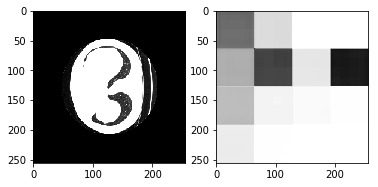

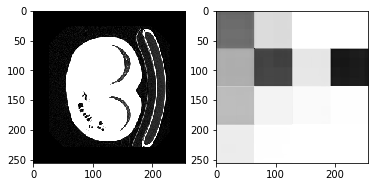

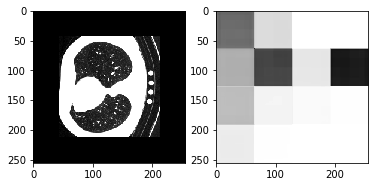

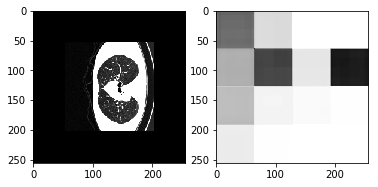

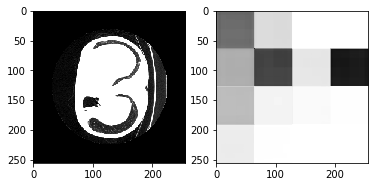

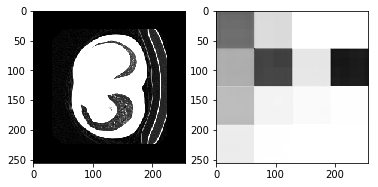

In [39]:
for iii in range(10):
    recon_x = M.G(M.E(X[ [iii] ])).cpu().data.numpy()[0,0]
    x = X[iii].cpu().data.numpy()
    plt.figure()
    plt.subplot(121)
    plt.imshow(x[0], cmap = "gray")
    plt.subplot(122)
    plt.imshow(recon_x, cmap = "gray")
    